In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import ipaddress
!pip install ace-tools-open

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.8 MB/s eta 0:00:00


In [8]:
#LOADING DATASET
file_path = '/AllTraffic.csv'
data = pd.read_csv(file_path)

#DISPLAYING BASIC INFORMATION
print("Dataset Overview:")
print(data.info())
print(data.head())

#CHECKING FOR MISSING VALUES
print("\nMissing Values:\n", data.isnull().sum())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215448 entries, 0 to 215447
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          215448 non-null  int64  
 1   Time         215448 non-null  float64
 2   Source       215448 non-null  object 
 3   Destination  215448 non-null  object 
 4   Protocol     215448 non-null  object 
 5   Length       215448 non-null  int64  
 6   Info         215432 non-null  object 
 7   Attack       215448 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 13.2+ MB
None
   No.        Time    Source Destination Protocol  Length  \
0    8  190.029423  10.0.0.2    10.0.0.4     ICMP      74   
1   11  190.029895  10.0.0.4    10.0.0.2     ICMP      74   
2   12  191.015148  10.0.0.2    10.0.0.4     ICMP      74   
3   13  191.015327  10.0.0.4    10.0.0.2     ICMP      74   
4   14  192.015217  10.0.0.2    10.0.0.4     ICMP      74   

       

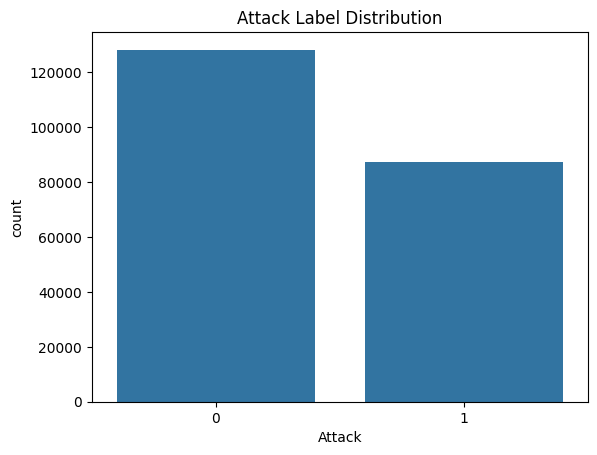

In [9]:
#GRAPHED ATTACK DISTRIBUTION
sns.countplot(x='Attack', data=data)
plt.title("Attack Label Distribution")
plt.show()


In [10]:
#CONVERT IP ADDRESSES TO INTEGERS
def ip_to_int(ip):
    try:
        return int(ipaddress.ip_address(ip))
    except ValueError:
        return 0

data['Source'] = data['Source'].apply(ip_to_int)
data['Destination'] = data['Destination'].apply(ip_to_int)

#ENCODE 'PROTOCOL' COLUMN
le = LabelEncoder()
data['Protocol'] = le.fit_transform(data['Protocol'])

#DROPPING UNNECESSARY COLUMNS
data = data.drop(['No.', 'Info'], axis=1)

# CHECKING PREPROCESSED DATA
print("\nPreprocessed Data:")
print(data.head())



Preprocessed Data:
         Time     Source  Destination  Protocol  Length  Attack
0  190.029423  167772162    167772164        15      74       0
1  190.029895  167772164    167772162        15      74       0
2  191.015148  167772162    167772164        15      74       0
3  191.015327  167772164    167772162        15      74       0
4  192.015217  167772162    167772164        15      74       0


In [11]:
#SEPERATE FEATURES X AND TARGET Y
X = data.drop('Attack', axis=1)
y = data['Attack']

#SPLIT TRAINING/TESTING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SCALING NUMERICAL VALUES
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully split and scaled.")


Data successfully split and scaled.


In [12]:
#LOGISTIC REGRESSION
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

#SVM
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

#RANDOM FOREST
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

print("Models trained successfully.")

Models trained successfully.



Logistic Regression Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     25647
           1       0.93      0.99      0.96     17443

    accuracy                           0.97     43090
   macro avg       0.96      0.97      0.96     43090
weighted avg       0.97      0.97      0.97     43090



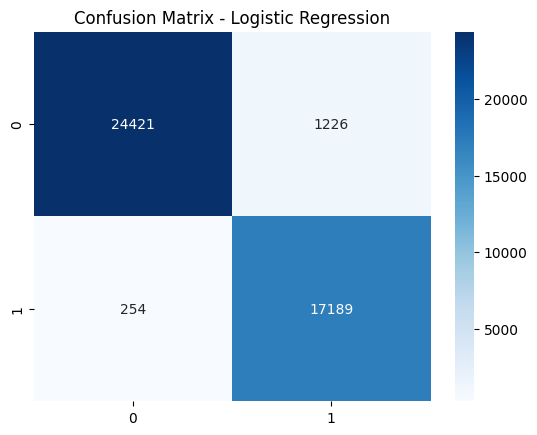


SVM Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     25647
           1       0.96      0.98      0.97     17443

    accuracy                           0.98     43090
   macro avg       0.97      0.98      0.97     43090
weighted avg       0.98      0.98      0.98     43090



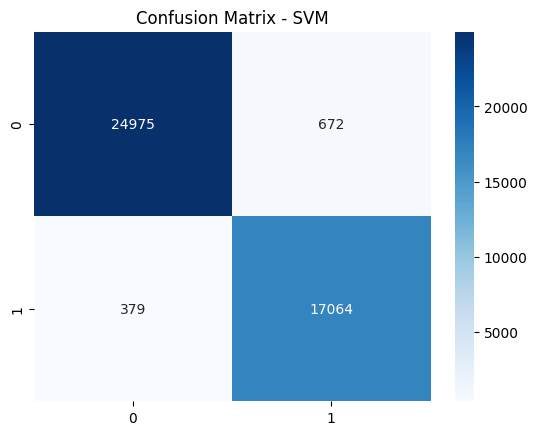


Random Forest Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25647
           1       1.00      1.00      1.00     17443

    accuracy                           1.00     43090
   macro avg       1.00      1.00      1.00     43090
weighted avg       1.00      1.00      1.00     43090



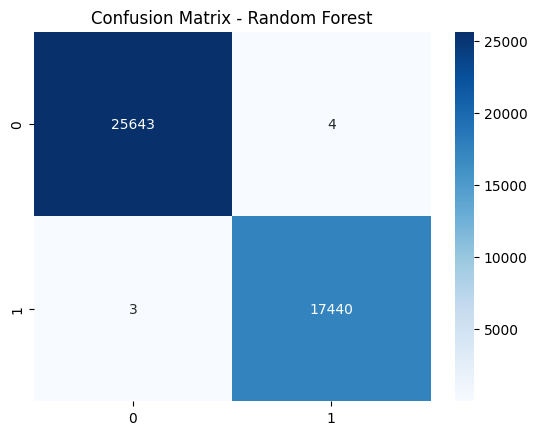

In [13]:
#FUNCTION TO EVALUATE THE MODELS
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    return accuracy

#EVALUATE THE MODELS
lr_accuracy = evaluate_model(lr_model, X_test_scaled, y_test, "Logistic Regression")
svm_accuracy = evaluate_model(svm_model, X_test_scaled, y_test, "SVM")
rf_accuracy = evaluate_model(rf_model, X_test_scaled, y_test, "Random Forest")


In [14]:
# Load new Metasploit data
metasploit_data_path = '/MetasploitFiltered.csv'
metasploit_attack_path = '/MetasploitAttack.csv'
metasploit_data = pd.read_csv(metasploit_data_path)
metasploit_attack = pd.read_csv(metasploit_attack_path)

# Preprocess new data
metasploit_data['Source'] = metasploit_data['Source'].apply(ip_to_int)
metasploit_data['Destination'] = metasploit_data['Destination'].apply(ip_to_int)
metasploit_data['Protocol'] = le.transform(metasploit_data['Protocol'])
metasploit_features = metasploit_data.drop(['Info', 'No.'], axis=1)
metasploit_scaled = scaler.transform(metasploit_features)

# Train a variable for the actual values of the metasploit data.
# It is all attack aka 1
sploit_X = metasploit_attack.drop('Attack', axis=1)
sploit_y = metasploit_attack['Attack']

# Create arrays with the predictions of each algorithm
pred_lr = lr_model.predict(metasploit_scaled)
pred_svm = svm_model.predict(metasploit_scaled)
pred_rf = rf_model.predict(metasploit_scaled)

# Test on new data
for model_name, model in zip(["Logistic Regression", "SVM", "Random Forest"],
                             [lr_model, svm_model, rf_model]):
    metasploit_pred = model.predict(metasploit_scaled)
    print(f"\n{model_name} Malicious Predictions: {sum(metasploit_pred)}")


Logistic Regression Malicious Predictions: 23114

SVM Malicious Predictions: 0

Random Forest Malicious Predictions: 22980


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x600 with 0 Axes>

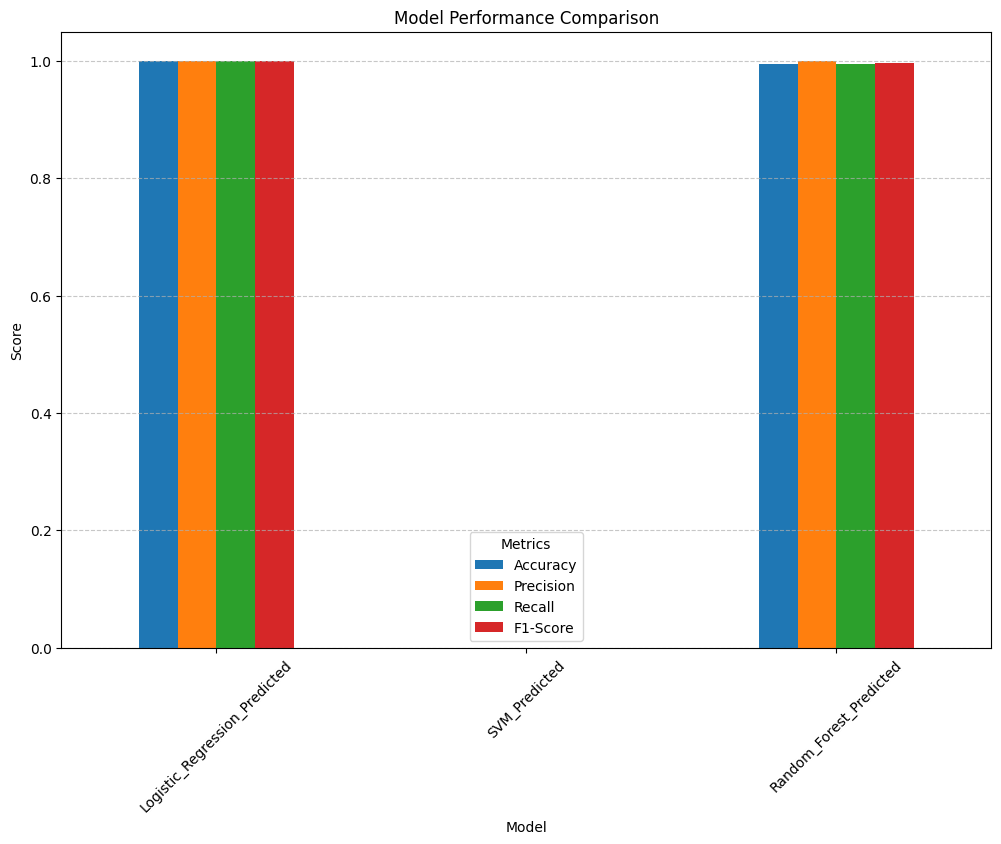

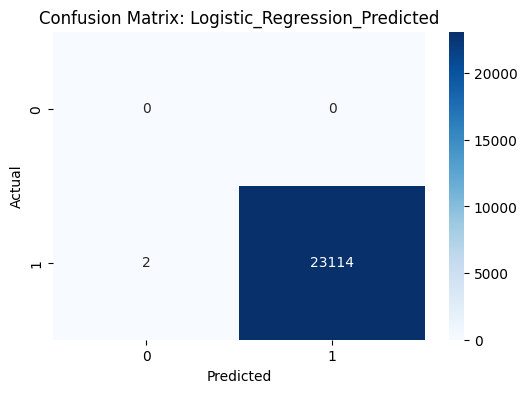

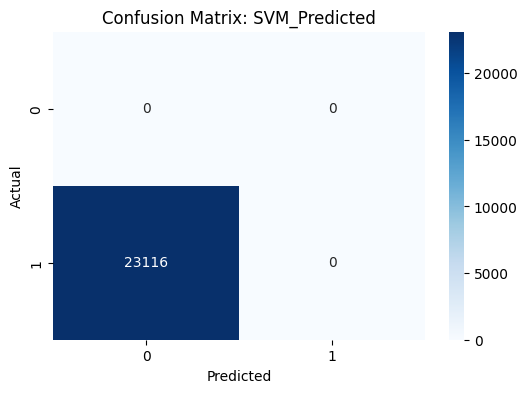

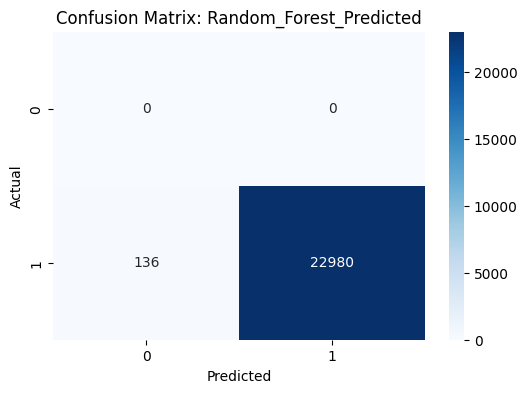

Model Performance Metrics


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Load the prediction arrays and the actual value array from the metasploit data
# Prediction arrays include columns: 'Actual', 'Logistic_Regression_Predicted', 'SVM_Predicted', 'Random_Forest_Predicted'

data = {
    'Actual': sploit_y,
    'Logistic_Regression_Predicted': pred_lr,
    'SVM_Predicted': pred_svm,
    'Random_Forest_Predicted': pred_rf,
}

predictions_df = pd.DataFrame(data)

# Prepare an expanded analysis
results = []

# Calculate evaluation metrics for each model
models = ['Logistic_Regression_Predicted', 'SVM_Predicted', 'Random_Forest_Predicted']
for model in models:
    accuracy = accuracy_score(predictions_df['Actual'], predictions_df[model])
    precision = precision_score(predictions_df['Actual'], predictions_df[model])
    recall = recall_score(predictions_df['Actual'], predictions_df[model])
    f1 = f1_score(predictions_df['Actual'], predictions_df[model])
    results.append({
        'Model': model,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Display the results in a DataFrame
results_df = pd.DataFrame(results)

# Visualize performance comparison
plt.figure(figsize=(10, 6))
results_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display confusion matrices for each model
for model in models:
    cm = confusion_matrix(predictions_df['Actual'], predictions_df[model])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Provide the performance metrics in a table format

import ace_tools_open as tools;
tools.display_dataframe_to_user(name="Model Performance Metrics", dataframe=results_df)
